## Занятие 1 (4.02):
## Объектно-ориентированное программирование на Python.


### Структура класса

class ИмяКласса:

    ПеременнаяКласса = Значение
    …
    
    def ИмяМетода(self, ...):
    
        self.ПеременнаяКласса = Значение

#### Пример: Класс прямоугольник

In [16]:
class Rectangle:
    default_color = "green"
    def __init__(self, width, height):
        self.width = width
        self.height = height

In [17]:
Rectangle.default_color

'green'

In [18]:
Rectangle.width

AttributeError: type object 'Rectangle' has no attribute 'width'

In [19]:
rect = Rectangle(1, 2)

In [20]:
rect.height

2

In [21]:
rect.width

1

In [22]:
Rectangle.default_color

'green'

In [23]:
Rectangle.default_color = "red"
Rectangle.default_color

'red'

In [24]:
r1 = Rectangle(1,2)
r2 = Rectangle(10, 20)

In [25]:
r1.default_color

'red'

In [26]:
r2.default_color

'red'

In [27]:
r1.default_color = "blue"
r1.default_color

'blue'

In [28]:
r2.default_color

'red'

#### Пример: класс Работник

In [37]:
class Employee:
   #'Common base class for all employees'
    empCount = 0
    employees = []
    def __init__(self, name, salary):
        self.name = name
        self.salary = salary
        Employee.empCount += 1
        Employee.employees.append(self)
        
    def displayCount(self):
        print("Total Employee %d" % Employee.empCount)
    def displayEmployee(self):
        print("Name : ", self.name,  ", Salary: ", self.salary)

In [38]:
emp1 = Employee("Olga", 20000)
emp2 = Employee("Maria", 50000)

In [31]:
Employee.empCount

2

### 1.1 Определите число сотрудников (создайте экземпляры класса; создайте экземпляр класса, перезапустите код с классом и снова создайте экзепляр класса)

In [32]:
emp1 = Employee("John", 10000)
emp2 = Employee("Smith", 20000)

In [33]:
Employee.empCount

4

### 1.2 Добавьте статический атрибут к классу Employee.

In [39]:
Employee.employees

[<__main__.Employee at 0x22bd54f0880>, <__main__.Employee at 0x22bd54f0e20>]

In [ ]:
class ToyClass:
    def instancemethod(self):
        return 'instance method called', self
    
    @classmethod
    def classmethod(cls):
        return 'class method called', cls
    @staticmethod
    def staticmethod():
        return 'static method called'

### Пример экземпляра класса

### 1.3 Воспользуйтесь документацией и найдите примеры (отличные от приведённого) методов экземпляра класса.

In [40]:
"welcome".upper() # пример

[].count(1)

0

### 1.4 Воспользуйтесь документацией и приведите примеры (отличные от приведённого) методов класса.

In [41]:
dict.fromkeys('AEIOU') # пример

bytes.fromhex('2Ef0 F1f2  ')

b'.\xf0\xf1\xf2'

### 1.5 Подумайте какой пример статического метода Вы модете привести?

In [43]:
class Person:
    @staticmethod
    def is_adult(age):
        return age >= 18

Person.is_adult(18), Person().is_adult(0)

(True, False)

## Абстрактные классы

In [ ]:
from abc import ABC, abstractmethod
 
class ChessPiece(ABC):
    # общий метод, который будут использовать все наследники этого класса
    def draw(self):
        print("Drew a chess piece")
 
    # абстрактный метод, который будет необходимо переопределять для каждого подкласса
    @abstractmethod
    def move(self):
        pass

In [ ]:
a = ChessPiece()

In [ ]:
class Queen(ChessPiece):
    def move(self):
        print("Moved Queen to e2e4")
 
    # Мы можем создать экземпляр класса
q = Queen()
    # И нам доступны все методы класса
q.draw()
q.move()

## Декомпозиция программы на модули

### 2. 1 Реализуйте пример основной программы и 2-4 модулей.

In [48]:
import sys
from operations import operations
from tokenizer import tokenize
def compute(tokens):
    stack = []
    for token in tokens:
        if token in operations:
            arg2 = stack.pop()
            arg1 = stack.pop()
            stack.append(operations[token](arg1, arg2))
        elif token.isnumeric():
            stack.append(int(token))
        else:
            print(f"Unsupported token: {token}", file=sys.stderr)
    return stack.pop()

compute(tokenize("2 3 + 5 -"))

0

### 2. 2 Импортируйте стандартный модуль sys и создайте объкты из этого моуля (см. презентацию). 

In [49]:
import sys

sys.stdin

<_io.TextIOWrapper name='<stdin>' mode='r' encoding='cp1252'>

### 2. 3 Воспользуйтесь модулем tempfile для создания временного файла.

### Примеры:

In [ ]:
import tempfile

# create a temporary file and write some data to it
fp = tempfile.TemporaryFile()
fp.write(b'Hello world!')
# read data from file
fp.seek(0)
fp.read()

In [ ]:
fp.close()

In [54]:
import tempfile
# create a temporary file using a context manager
with tempfile.TemporaryFile() as fp:
    fp.write(b'Hello world!')
    fp.seek(0)
    print(fp.read())

b'Hello world!'


In [55]:
# create a temporary directory using the context manager
with tempfile.TemporaryDirectory() as tmpdirname:
    print('created temporary directory', tmpdirname)

created temporary directory C:\Users\mario\AppData\Local\Temp\tmpqi465_nr


### Создайте csv файл и импортируйте его.

Matplotlib is building the font cache; this may take a moment.


RuntimeError: matplotlib does not support generators as input

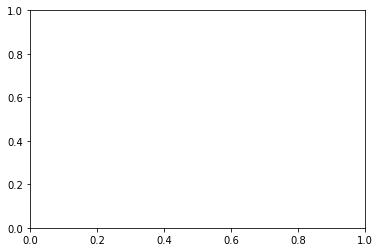

In [70]:
import csv
import matplotlib.pyplot as pyplot
with open('weather.csv', newline='') as File:  
    reader = csv.reader(File)
    iter_reader = iter(reader)
    header = next(iter_reader)
    data = (dict(zip(header, row)) for row in iter_reader)
    pyplot.plot((round(float(row['MaxTemp']) - float(row['MinTemp']), 2) for row in data))